In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import networkx as nx

In [ ]:
df = pd.read_excel("Customer Survey.xlsx")
df.head(5)

,Date,Time,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,2021-03-20,11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20,11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2021-03-20,11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20,11:54:13,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2021-03-20,11:54:18,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [ ]:
df.drop(labels=df.columns[0:2].tolist(), axis=1, inplace=True)
df.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [ ]:
print(df.shape)
print(df.columns)
print(df.info())

(44, 60)
Index(['Moutain bike', 'Collagen', 'Green Brownie', 'Mekhong', 'Botox',
       'Cannabis', 'Hemp', 'Pressure gauge', 'LED RGB', 'Bikini wax',
       'Electric massage chair', 'Ornamental plants', 'Bolster', 'Scales',
       'Jaw botox', 'SangSom', 'Curry puff', 'Lego', 'Fan', 'Pickle drink',
       'Nightdress', 'Dumbell', 'Robot cleaner', 'Wa grill', 'Pork stick',
       'UAV', 'Food waste shredder', 'C2-shirt', 'Yipsee card', 'BBQ',
       'Document grinder', 'Bag', 'Shabu', 'Surfskate', 'Board game',
       'Dog shirt', 'Omakase', 'Cashew nuts', 'AI LED', 'Hair clippers',
       'Dyson', 'Music Discs', 'Nose hair scissors', 'PS5',
       'Blood Glucose Meter', 'Roti', 'Pickled Shrimp Paste', 'Dog',
       'Thai travel', 'FIFA Online', 'Mango', 'Cat auto toilet',
       'bag (Chanel)', 'Kaki', 'Cordyceps', 'Healthy pillow for insomnia',
       'Clean food for cat', 'Dido', 'Software', 'Sunscreen'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 en

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

Moutain bike                   0
Collagen                       0
Green Brownie                  0
Mekhong                        0
Botox                          0
Cannabis                       0
Hemp                           0
Pressure gauge                 0
LED RGB                        0
Bikini wax                     0
Electric massage chair         0
Ornamental plants              0
Bolster                        0
Scales                         0
Jaw botox                      0
SangSom                        0
Curry puff                     0
Lego                           0
Fan                            0
Pickle drink                   0
Nightdress                     0
Dumbell                        0
Robot cleaner                  0
Wa grill                       0
Pork stick                     1
UAV                            0
Food waste shredder            0
C2-shirt                       0
Yipsee card                    0
BBQ                            0
Document g

In [ ]:
#remove null
df1 = df.dropna().reset_index(drop=True) 
df.isnull().head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for i in df1.columns:
  df1[i] = df1[i].replace(['เคย'],1)
  df1[i] = df1[i].replace(['ไม่เคย'],0)
  
df1.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1


In [ ]:
#EDA

df1.describe()

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.0
mean,0.350000,0.525000,0.100000,0.325000,0.175000,0.175000,0.075000,0.37500,0.250000,0.075000,0.125000,0.675000,0.875000,0.675000,0.100000,0.350000,0.950000,0.62500,0.825000,0.275000,0.175000,0.600000,0.525000,0.675000,0.800000,0.125000,0.050000,0.250000,0.250000,0.725000,0.175000,1.0,1.0,0.075000,0.650000,0.325000,0.225000,0.900000,0.350000,0.175000,0.075000,0.200000,0.400000,0.050000,0.225000,0.975000,0.225000,0.200000,0.475000,0.125000,0.400000,0.075000,0.075000,0.100000,0.175000,0.37500,0.075000,0.700000,0.800000,1.0
std,0.483046,0.505736,0.303822,0.474342,0.384808,0.384808,0.266747,0.49029,0.438529,0.266747,0.334932,0.474342,0.334932,0.474342,0.303822,0.483046,0.220721,0.49029,0.384808,0.452203,0.384808,0.496139,0.505736,0.474342,0.405096,0.334932,0.220721,0.438529,0.438529,0.452203,0.384808,0.0,0.0,0.266747,0.483046,0.474342,0.422902,0.303822,0.483046,0.384808,0.266747,0.405096,0.496139,0.220721,0.422902,0.158114,0.422902,0.405096,0.505736,0.334932,0.496139,0.266747,0.266747,0.303822,0.384808,0.49029,0.266747,0.464095,0.405096,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.250000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,

In [ ]:
purchase_product = list()
print('สินค้าที่คนส่วนใหญ่เคยซื้อ : ')
for i in df1.columns:
  if len(df1[i].unique()) == 1 :
    purchase_product.append(i)
    print(i)

สินค้าที่คนส่วนใหญ่เคยซื้อ : 
Bag
Shabu
Sunscreen


In [ ]:
df2 = df1.sum().to_frame().transpose()
df2 = df1.sum().sort_values(ascending=True).to_frame().transpose()
df2

,Food waste shredder,PS5,Clean food for cat,Surfskate,bag (Chanel),Dyson,Bikini wax,Cat auto toilet,Hemp,Kaki,Jaw botox,Green Brownie,Electric massage chair,UAV,FIFA Online,Nightdress,Document grinder,Cordyceps,Botox,Cannabis,Hair clippers,Dog,Music Discs,Omakase,Pickled Shrimp Paste,Blood Glucose Meter,C2-shirt,Yipsee card,LED RGB,Pickle drink,Mekhong,Dog shirt,AI LED,Moutain bike,SangSom,Healthy pillow for insomnia,Pressure gauge,Mango,Nose hair scissors,Thai travel,Robot cleaner,Collagen,Dumbell,Lego,Board game,Scales,Ornamental plants,Wa grill,Dido,BBQ,Software,Pork stick,Fan,Bolster,Cashew nuts,Curry puff,Roti,Shabu,Bag,Sunscreen
0,2,2,3,3,3,3,3,3,3,4,4,4,5,5,5,7,7,7,7,7,7,8,8,9,9,9,10,10,10,11,13,13,14,14,14,15,15,16,16,19,21,21,24,25,26,27,27,27,28,29,32,32,33,35,36,38,39,40,40,40


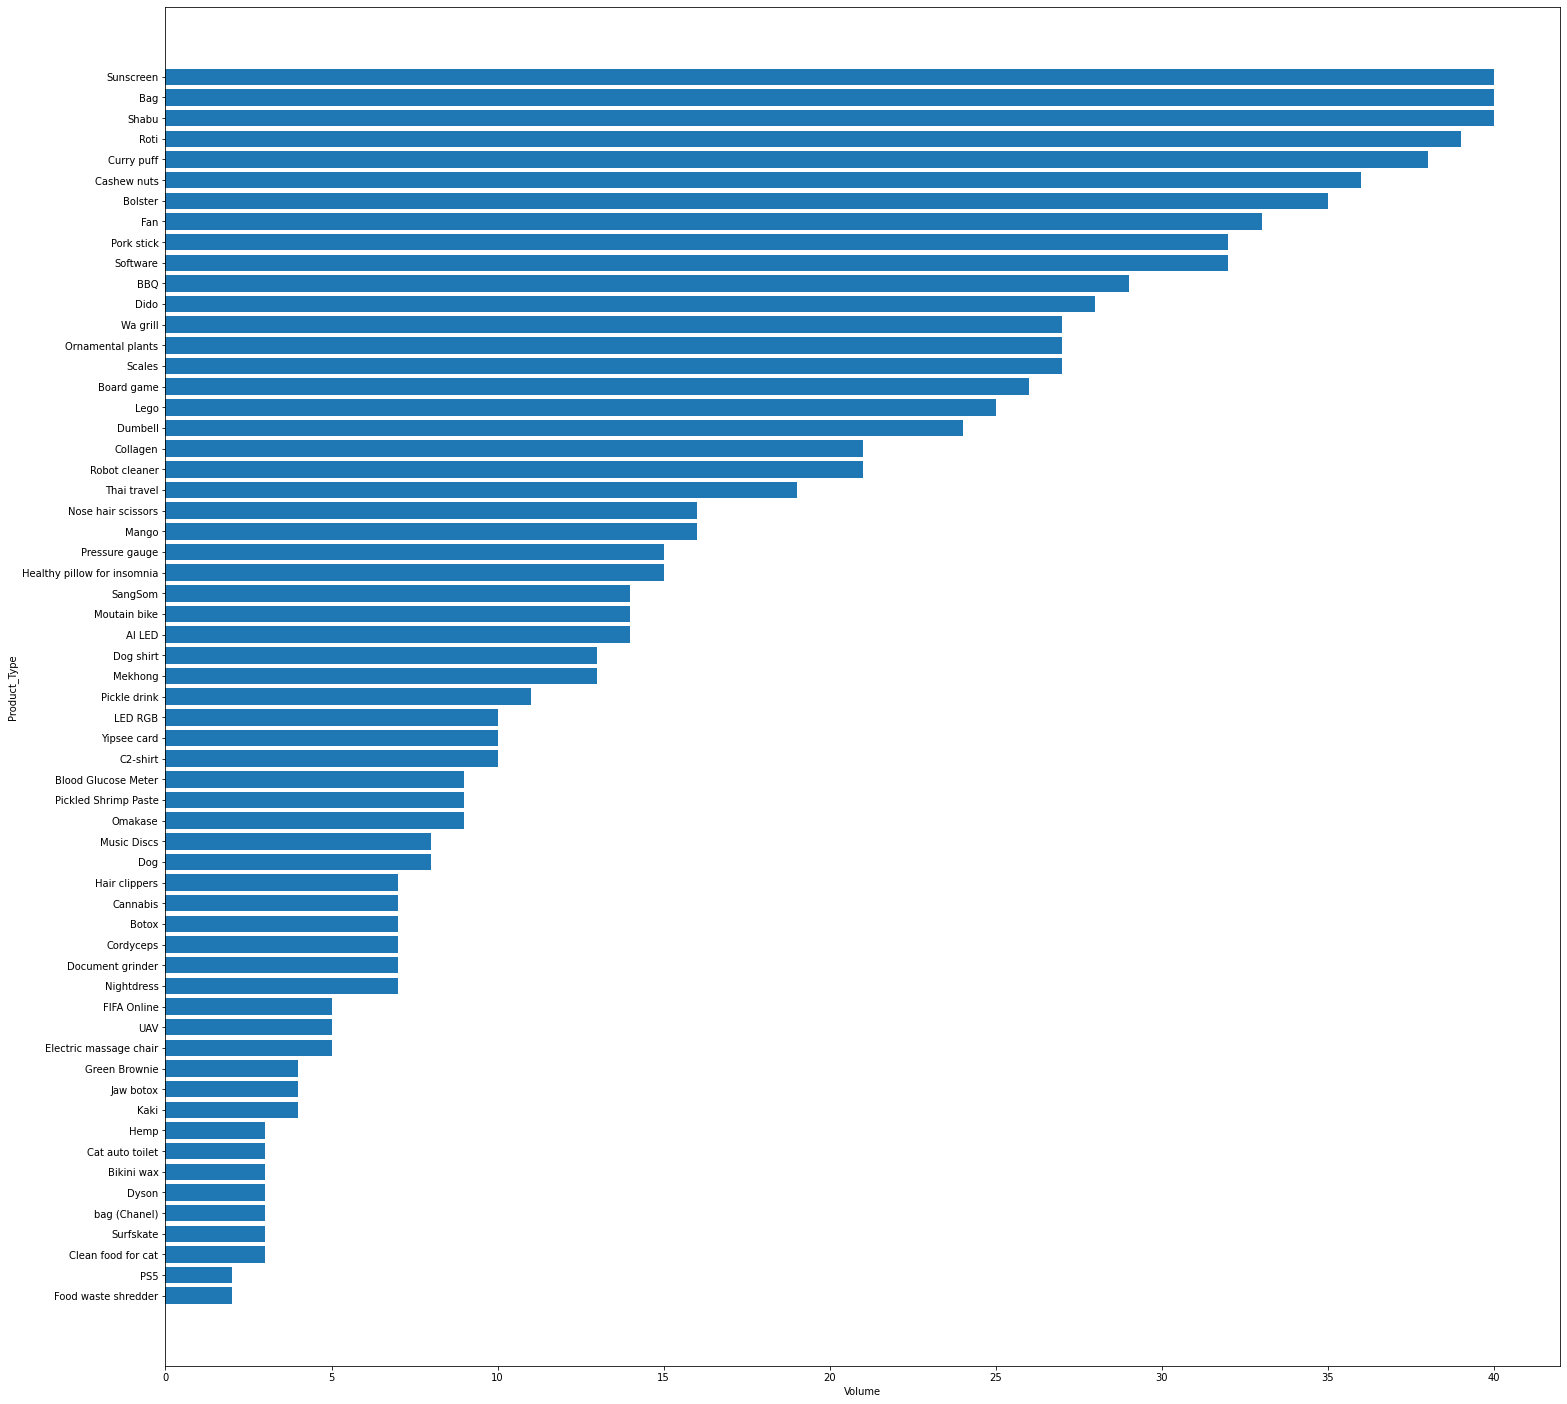

In [ ]:
# Chart
x = df2.sum()
y = df2.columns

plt.barh(y,x)
plt.xlabel('Volume')
plt.ylabel('Product_Type')

plt.show()

In [ ]:
product = list(df2.columns)
product.reverse()

n = 5
top5 = product[0:n]
print('สินค้าที่คนส่วนใหญ่เคยซื้อ : ',n,'อันดับ : \n',top5)

สินค้าที่คนส่วนใหญ่เคยซื้อ :  5 อันดับ : 
 ['Sunscreen', 'Bag', 'Shabu', 'Roti', 'Curry puff']


In [ ]:
df3 = df1.drop(top_product, axis=1)
df3.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Scales,Jaw botox,SangSom,Lego,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Surfskate,Board game,Dog shirt,Omakase,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
item_to_item = pd.DataFrame(index=df3.columns,columns=df3.columns)

In [ ]:
for i in range(0,len(item_to_item.columns)):
  for j in range(0,len(item_to_item.columns)):
    item_to_item.iloc[i,j] = 1 - cosine(df3.iloc[:,i],df3.iloc[:,j])

In [ ]:
item_to_item.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Scales,Jaw botox,SangSom,Lego,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Surfskate,Board game,Dog shirt,Omakase,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido
Moutain bike,1,0.583212,0.267261,0.370625,0.404061,0.202031,0.154303,0.483046,0.507093,0.154303,0.119523,0.514344,0.565779,0.267261,0.357143,0.587975,0.241747,0.202031,0.709208,0.583212,0.514344,0.358569,0.377964,0.338062,0.338062,0.545921,0.505076,0.46291,0.471728,0.370625,0.356348,0.642857,0.303046,0.46291,0.377964,0.534522,0.188982,0.534522,0.445435,0.377964,0.367884,0.119523,0.467707,0.46291,0.308607,0.267261,0.101015,0.483046,0.46291,0.505076
Collagen,0.583212,1,0.327327,0.363137,0.57735,0.164957,0.251976,0.394405,0.345033,0.377964,0.09759,0.629941,0.629941,0.436436,0.349927,0.698297,0.394771,0.412393,0.668153,0.571429,0.503953,0.29277,0.308607,0.621059,0.483046,0.567309,0.412393,0.251976,0.470757,0.544705,0.363696,0.466569,0.329914,0.251976,0.385758,0.49099,0.154303,0.436436,0.509175,0.46291,0.550689,0.19518,0.545545,0.377964,0.377964,0.218218,0.247436,0.563436,0.377964,0.659829
Green Brownie,0.267261,0.327327,1,0.416025,0.377964,0.566947,0.57735,0.129099,0.158114,0.288675,0.447214,0.3849,0.288675,0.25,0.267261,0.4,0.301511,0.188982,0.408248,0.436436,0.3849,0.447214,0.353553,0.158114,0.316228,0.278543,0.188982,0.288675,0.294174,0.138675,0.333333,0.400892,0.377964,0.288675,0.53033,0.25,0.353553,0.333333,0.333333,0.176777,0.229416,0.447214,0.25,0.57735,0.866025,0.5,0.188982,0.387298,0.57735,0.283473
Mekhong,0.370625,0.363137,0.416025,1,0.209657,0.524142,0.320256,0.429669,0.263117,0.160128,0.496139,0.587137,0.427008,0.138675,0.889499,0.38829,0.334497,0.314485,0.509525,0.484182,0.587137,0.372104,0.196116,0.263117,0.438529,0.515026,0.209657,0.160128,0.435143,0.0769231,0.46225,0.2965,0.314485,0.320256,0.392232,0.624038,0.196116,0.1849,0.3698,0,0.318142,0.372104,0.416025,0.480384,0.320256,0.138675,0.209657,0.50128,0.320256,0.419314
Botox,0.404061,0.57735,0.377964,0.209657,1,0.142857,0.218218,0.29277,0.358569,0.218218,0.169031,0.290957,0.290957,0.755929,0.202031,0.302372,0.341882,0.428571,0.540062,0.329914,0.363696,0.169031,0.267261,0.478091,0.358569,0.350931,0.285714,0.218218,0.14825,0.314485,0.251976,0.303046,0.285714,0.218218,0.267261,0.377964,0.267261,0.503953,0.377964,0.267261,0.346844,0.169031,0.283473,0.218218,0.436436,0.377964,0.142857,0.39036,0.218218,0.285714


In [ ]:
linkage = item_to_item.rename_axis('related_product',axis='columns').stack().reset_index()
linkage

,level_0,related_product,0
0,Moutain bike,Moutain bike,1
1,Moutain bike,Collagen,0.583212
2,Moutain bike,Green Brownie,0.267261
3,Moutain bike,Mekhong,0.370625
4,Moutain bike,Botox,0.404061
...,...,...,...
2495,Dido,Kaki,0.188982
2496,Dido,Cordyceps,0.357143
2497,Dido,Healthy pillow for insomnia,0.634335
2498,Dido,Clean food for cat,0.327327


In [ ]:
linkage.columns = ['product','related_product','score']
linkage_fillter = linkage.loc[(linkage['score'] > 0.6)& (linkage['product']!=linkage['related_product'])]
linkage_fillter.sort_values(by=['score'],ascending=False)

,product,related_product,score
1270,BBQ,Wa grill,0.929164
1025,Wa grill,BBQ,0.929164
164,Mekhong,SangSom,0.889499
703,SangSom,Mekhong,0.889499
2202,bag (Chanel),Green Brownie,0.866025
...,...,...,...
1857,Blood Glucose Meter,Pressure gauge,0.602464
735,SangSom,Nose hair scissors,0.601338
1764,Nose hair scissors,SangSom,0.601338
1769,Nose hair scissors,Robot cleaner,0.600099


In [ ]:
linkage_fillter.sort_values(by=['score'],ascending=False).head(10)

,product,related_product,score
1270,BBQ,Wa grill,0.929164
1025,Wa grill,BBQ,0.929164
164,Mekhong,SangSom,0.889499
703,SangSom,Mekhong,0.889499
2202,bag (Chanel),Green Brownie,0.866025
144,Green Brownie,bag (Chanel),0.866025
2422,Clean food for cat,Food waste shredder,0.816497
1148,Food waste shredder,Clean food for cat,0.816497
761,Lego,Ornamental plants,0.80829
565,Ornamental plants,Lego,0.80829


In [ ]:
linkage_fillter.loc[(linkage['product'] == 'BBQ')]

,product,related_product,score
1261,BBQ,Ornamental plants,0.786216
1262,BBQ,Scales,0.750479
1265,BBQ,Lego,0.742781
1268,BBQ,Dumbell,0.682288
1269,BBQ,Robot cleaner,0.607831
1270,BBQ,Wa grill,0.929164
1278,BBQ,Board game,0.691939
1285,BBQ,Nose hair scissors,0.649934
1299,BBQ,Dido,0.666769


In [ ]:
linkage_fillter.loc[(linkage['product'] == 'bag (Chanel)')]

,product,related_product,score
2202,bag (Chanel),Green Brownie,0.866025
2243,bag (Chanel),Cat auto toilet,0.666667
2248,bag (Chanel),Clean food for cat,0.666667


In [ ]:
linkage_fillter.loc[(linkage['product'] == 'Dumbell')]

,product,related_product,score
900,Dumbell,Moutain bike,0.709208
901,Dumbell,Collagen,0.668153
911,Dumbell,Ornamental plants,0.707107
912,Dumbell,Scales,0.628539
915,Dumbell,Lego,0.653197
919,Dumbell,Robot cleaner,0.62361
920,Dumbell,Wa grill,0.707107
925,Dumbell,BBQ,0.682288
937,Dumbell,Blood Glucose Meter,0.612372
942,Dumbell,Mango,0.663403


In [ ]:
linkage_fillter.loc[(linkage['product'] == 'SangSom')]

,product,related_product,score
703,SangSom,Mekhong,0.889499
711,SangSom,Ornamental plants,0.617213
735,SangSom,Nose hair scissors,0.601338


In [ ]:
linkage_fillter.loc[(linkage['product'] == 'Collagen')]

,product,related_product,score
61,Collagen,Ornamental plants,0.629941
62,Collagen,Scales,0.629941
65,Collagen,Lego,0.698297
68,Collagen,Dumbell,0.668153
73,Collagen,C2-shirt,0.621059
99,Collagen,Dido,0.659829


In [ ]:
linkage_fillter.loc[(linkage['product'] == 'Moutain bike')]

,product,related_product,score
18,Moutain bike,Dumbell,0.709208
31,Moutain bike,AI LED,0.642857
